<a href="https://colab.research.google.com/github/JackMyles/CS156a-LearningFromData/blob/main/cs156a_hw5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CS 156a HW 5

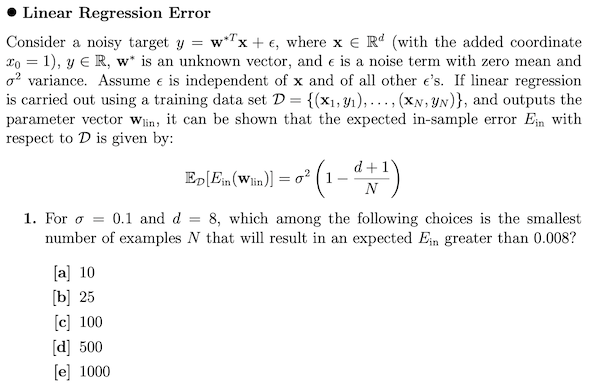

#### Answer:
C

In [31]:
sigma = 0.1
d = 8
N_choices = [10, 25, 100, 500, 1000]

solution = max(N_choices)

for N in N_choices:
    error = sigma ** 2 * (1 - (d + 1) / N)
    print("E_D[E_in(w_lin)] for N =", N, "is", "%.5f" % error)



E_D[E_in(w_lin)] for N = 10 is 0.00100
E_D[E_in(w_lin)] for N = 25 is 0.00640
E_D[E_in(w_lin)] for N = 100 is 0.00910
E_D[E_in(w_lin)] for N = 500 is 0.00982
E_D[E_in(w_lin)] for N = 1000 is 0.00991


N = 100 is the smallest number of examples that will result in an $E_{in}$ > 0.008

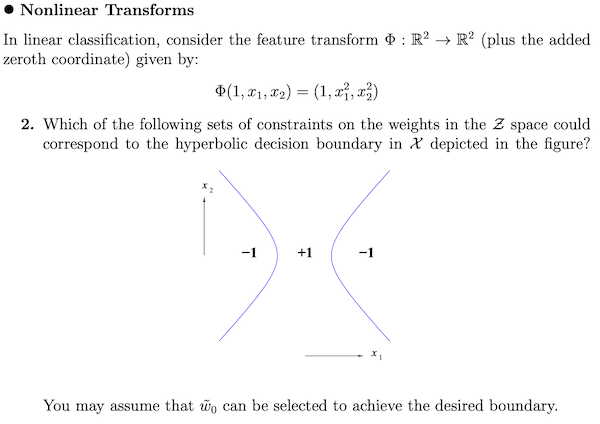
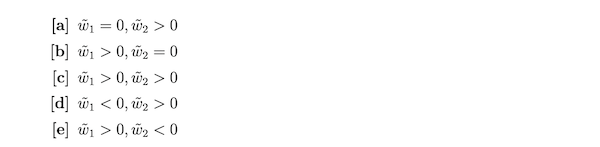

#### Answer:
D

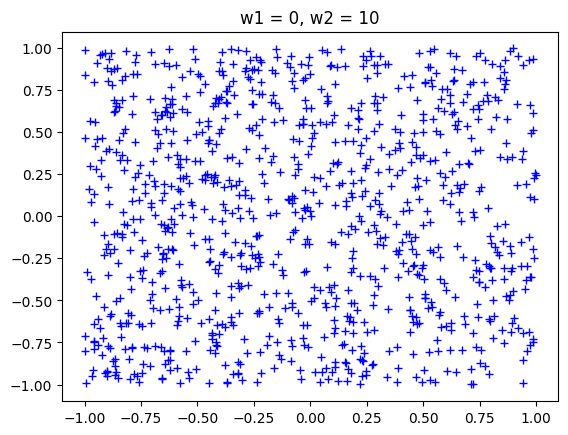

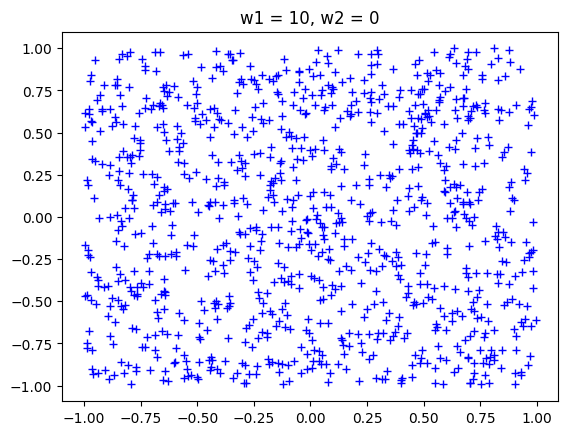

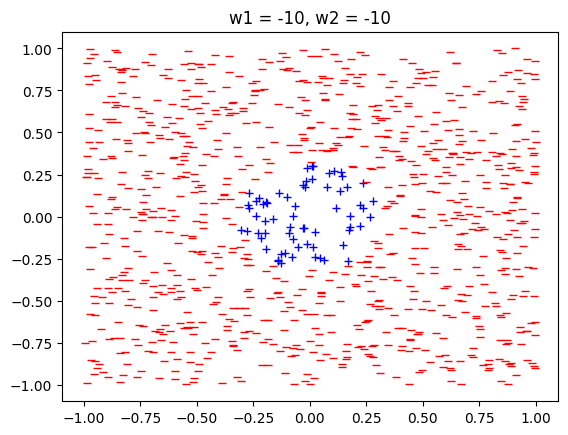

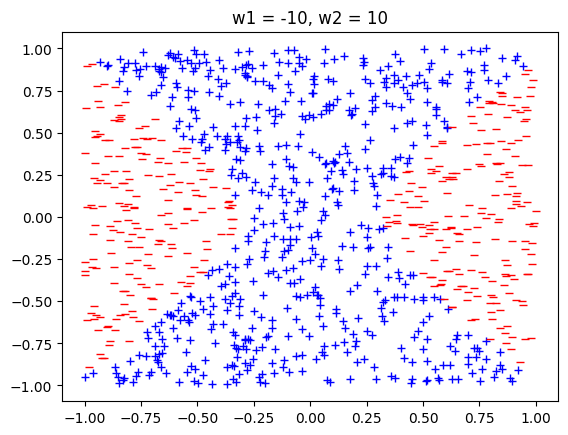

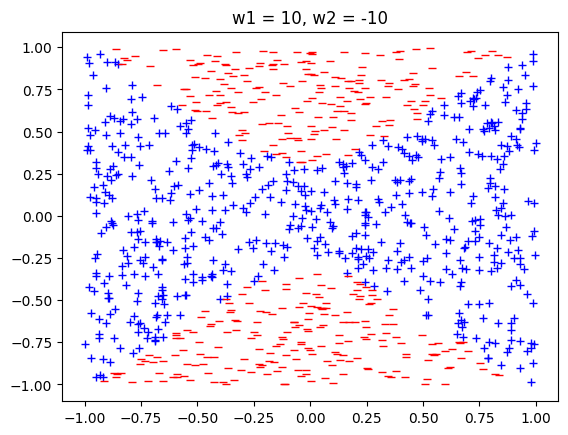

In [32]:
import numpy as np
import matplotlib.pyplot as plt

def p2(w1, w2):
    w = np.array([1, w1, w2])
    N = 1000

    x1 = np.random.uniform(-1, 1, N)
    x2 = np.random.uniform(-1, 1, N)
    Z = np.array([np.ones(N), x1**2, x2**2]).T

    pos, neg = [], []

    for i, z in enumerate(Z):
        if (np.sign(np.dot(z, w))) == 1:
            pos.append(i)
        else:
            neg.append(i)

    plt.plot(x1[pos], x2[pos], 'b+')
    plt.plot(x1[neg], x2[neg], 'r_')
    plt.title(f"w1 = {w1}, w2 = {w2}")
    plt.show()

# [a]
p2(0, 10)
# [b]
p2(10, 0)
# [c]
p2(-10, -10)
# [d]
p2(-10, 10)
# [e]
p2(10, -10)

The graph with w1 = -10 and w2 = 10 corresponds most to the hyperbolic decision boundary in X depicted in the figure (w1 < 0 and w2 > 0).

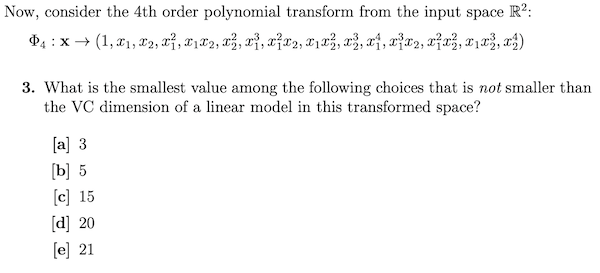

#### Answer:
C

$d_{vc} \leq \tilde{d} + 1$ (slide 4 lecture 9)

$\tilde{d} = 14$

$d_{vc} \leq 15$

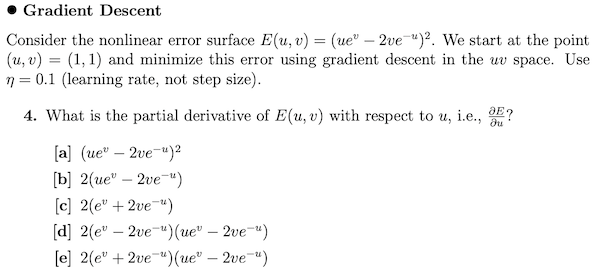

#### Answer:
E

$\frac{\partial E}{\partial u} (ue^v-2ve^{-u})^2 = \frac{\partial E}{\partial u}(ue^v-2ve^{-u})(ue^v-2ve^{-u}) = (ue^v-2ve^{-u})(e^v+2ve^{-u}) + (e^v+2ve^{-u})(ue^v-2ve^{-u}) = 2(e^v+2ve^{-u})(ue^v-2ve^{-u})$

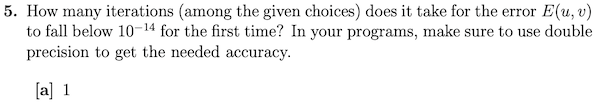
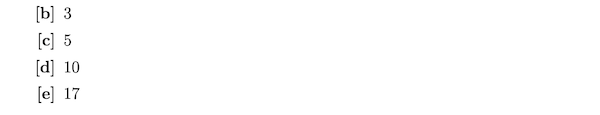

#### Answer:
D

In [33]:
import math
e = math.e

w = np.array([1.0, 1.0])
E = lambda u, v: (u * e**v - 2 * v * e**(-u))**2
dE_du = lambda u, v: 2 * (u * e**v - 2 * v * e**(-u)) * (e**v + 2 * v * e**(-u))
dE_dv = lambda u, v: 2 * (u * e**v - 2 * v * e**(-u)) * (u * e**v - 2 * e**(-u))

eta = 0.1
i = 0

while (E(w[0], w[1]) >= 1e-14):
    gradient = np.array([dE_du(w[0], w[1]), dE_dv(w[0], w[1])])
    w = w - eta * gradient
    i += 1

print("# of iterations for E(u,v) to fall below 10^(-14):", i)

# of iterations for E(u,v) to fall below 10^(-14): 10


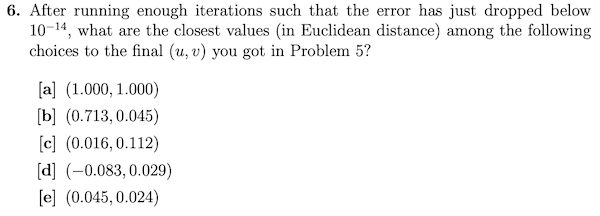

#### Answer:
E

In [34]:
print("Final (u,v) =", w)

Final (u,v) = [0.04473629 0.02395871]


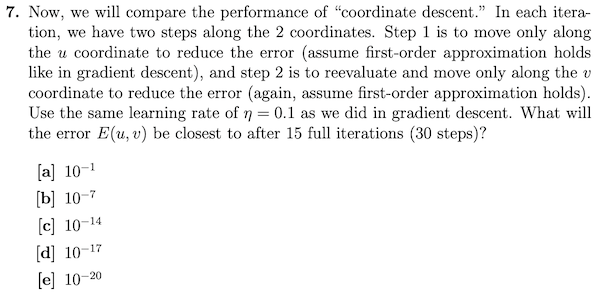

#### Answer:
A

In [35]:
w = np.array([1.0, 1.0])
E = lambda u, v: (u * e**v - 2 * v * e**(-u))**2
dE_du = lambda u, v: 2 * (u * e**v - 2 * v * e**(-u)) * (e**v + 2 * v * e**(-u))
dE_dv = lambda u, v: 2 * (u * e**v - 2 * v * e**(-u)) * (u * e**v - 2 * e**(-u))

eta = 0.1

for i in range(15):
    gradient = np.array([dE_du(w[0], w[1]), 0])
    w = w - eta * gradient
    gradient = np.array([0, dE_dv(w[0], w[1])])
    w = w - eta * gradient


print("Final E(u, v) =", E(w[0], w[1]))

Final E(u, v) = 0.13981379199615324


~ 10^-1

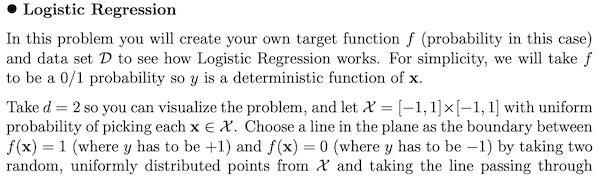
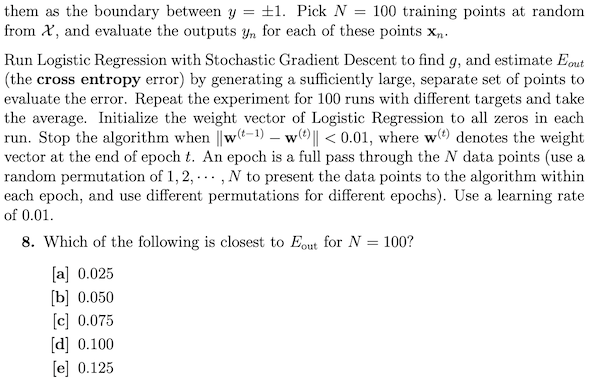

#### Answer:
D

(Code below question 9)

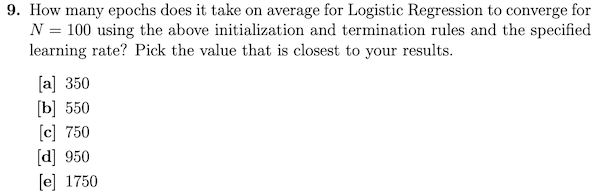

#### Answer:
A

In [36]:
def get_y(X, m, b):
    y = []
    for p in X:
        if p[2] >= (m * p[1] + b):
            y.append(1)
        else:
            y.append(-1)
    return np.array(y)

RUNS = 100
E_out_total = 0
epoch_total = 0
eta = 0.01
N = 100

for _ in range(RUNS):
    p1 = np.random.uniform(-1, 1, 2)
    p2 = np.random.uniform(-1, 1, 2)

    m = (p2[1] - p1[1]) / (p2[0] - p1[0])
    b = p1[1] - m * p1[0]

    X = np.insert(np.random.uniform(-1, 1, (N, 2)), 0, 1, axis=1)
    y = get_y(X, m, b)

    w = np.zeros(3)
    epochs = 0

    while True:
        w_old = w
        shuffled_indices = np.random.permutation(N)
        X = X[shuffled_indices]
        y = y[shuffled_indices]

        for n in range(N):
            gradient_E_in = (-y[n] * X[n]) / (1 + e**(y[n] * np.dot(w.T, X[n])))
            w = w - eta * gradient_E_in

        epochs += 1

        if (np.linalg.norm(w_old - w) < 0.01):
            break

    epoch_total += epochs

    N_test = 1000
    X_test = np.insert(np.random.uniform(-1, 1, (N_test, 2)), 0, 1, axis=1)
    y_test = get_y(X_test, m, b)

    # Calculate E_out using cross entropy error
    E_out = 0
    for n in range(N_test):
        E_out += np.log(1 + e**(-y_test[n] * np.dot(w.T, X_test[n])))

    E_out_total += (E_out / N_test)

E_out_avg = E_out_total / RUNS
epoch_avg = epoch_total / RUNS

print(f"Average E_out for N = {N} runs: ", E_out_avg)
print(f"Average epochs: ", epoch_avg)

Average E_out for N = 100 runs:  0.1025062152466755
Average epochs:  337.53


Average $E_{out}$ ~ 0.100

Average epochs ~ 350

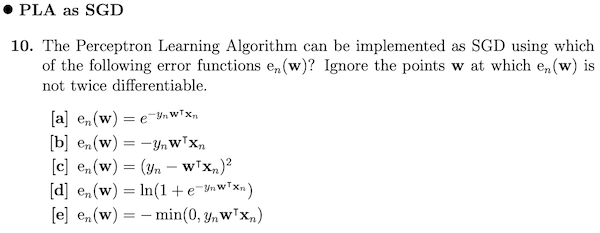

#### Answer:
E

Let $e(w) = -yw^Tx$ for SGD

$\frac{\partial e(w)}{\partial w_n} = -yx_n$ s.t. $n \in [-1, 0, 1]$

$\nabla{e(w)} = [\frac{\partial e(w)}{\partial w_{-1}}, \frac{\partial e(w)}{\partial w_0}, \frac{\partial e(w)}{\partial w_1}] = -y[x_{-1}, x_0, x_1] = -yx$

In SGD,
$w ← w - ƞ\nabla{e(w)} = w - ƞ{(-yx)} = w + ƞ{(yx)}$

$ƞ = 1$, so $w ← w + yx$

In PLA we only pick missclassified points and the correctly classified points have no effect on $w$.

Thus, $e(w) = -min(0, yw^Tx)$

This is really the only answer choice that makes sense because all of the other ones seem to be differentiable, which would not work given the nature of the PLA classification system.